In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
df = pd.read_csv("updatedMLdataset.csv")


In [4]:
print(df.head())

   ID  additions  deletions  num_easy_y1  year status
0   1          1          1            0  2010    new
1   2         73         27            0  2010    new
2   3          3          1            0  2011    new
3   4         93         44            0  2011    new
4   5       5078       5083            0  2011    new


In [5]:
print(df.shape) # size of data set


(3942, 6)


In [6]:
#Checking for missing value
missing_df = df.isnull().sum()
print(missing_df)

ID             0
additions      0
deletions      0
num_easy_y1    0
year           0
status         0
dtype: int64


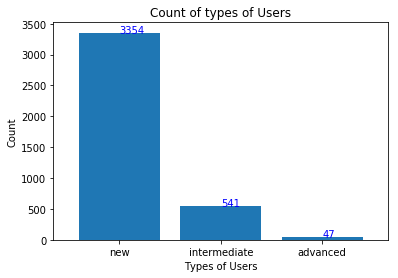

In [7]:
df['status'].value_counts().plot(kind='bar')

#Add count over the bar
ax=df['status'].value_counts().plot.bar(width=.8)
for i, v in df['status'].value_counts().reset_index().iterrows():
    ax.text(i, v.status + 0.3, v.status, color='blue')
    
plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Types of Users')
plt.ylabel('Count')
plt.title('Count of types of Users')
plt.show()

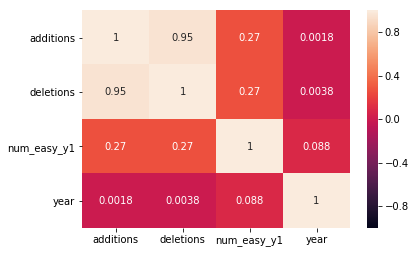

In [8]:
#Pairwise correlation between attributes
sns.heatmap(df[['additions', 'deletions', 'num_easy_y1', 'year' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

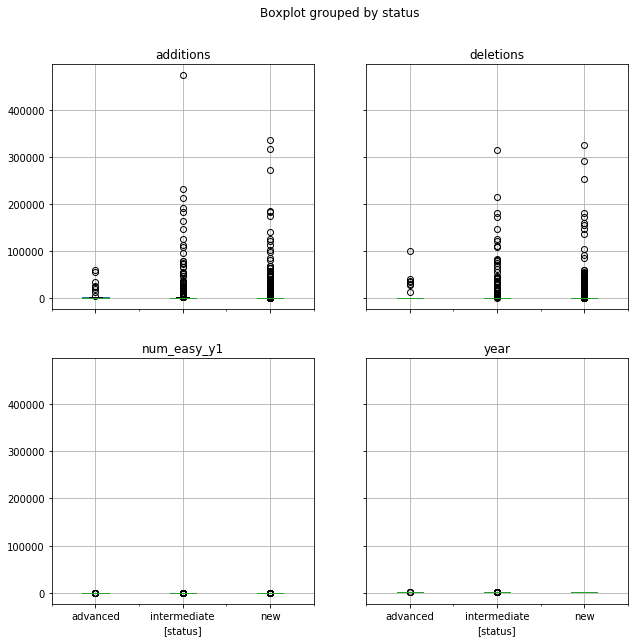

In [9]:
#Boxplot of variables
df.drop("ID", axis=1).boxplot(by = "status", figsize = (10, 10))
plt.show()

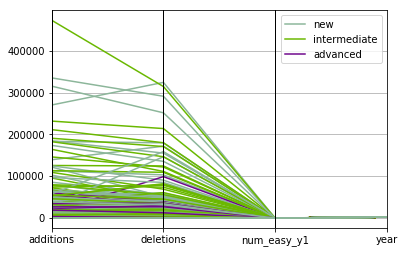

In [10]:
from pandas.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(df.drop("ID", axis=1), "status")

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


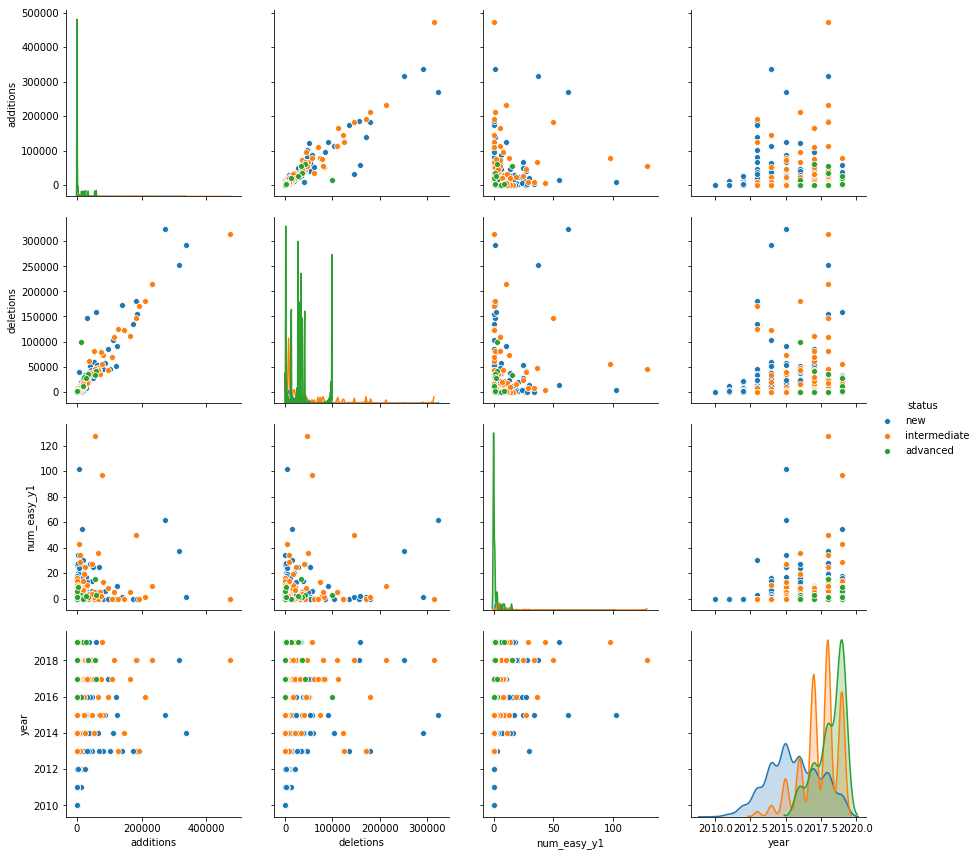

In [11]:
#Plot relationship between pairwise
sns.pairplot(df.drop("ID", axis = 1), hue="status", size=3)
plt.show()